In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import circlify

## ***Data Loading***

In [13]:
# Load product data
product_data = pd.read_csv('/Users/chintu/Desktop/code/flipkart/dim_product.csv')

# retreiving head of dataframe
product_data.head()

,Unnamed: 0,product_id,product_name,unit,product_type,brand_name,manufacturer_name,l0_category,l1_category,l2_category,l0_category_id,l1_category_id,l2_category_id
0,0,476763,Christmas - Card,1 unit,Card,NaN,HOT,Specials,Bill Breaker,Bill Breaker,343,1741,1741
1,1,483436,Plum BodyLovin' Hawaiian Rumba Shower Gel - Sa...,20 ml,Sample,Plum BodyLovin',Pureplay Skin Sciences India Pvt. Ltd.,Specials,Free Store,Free Store,343,1493,1493
2,2,476825,Diwali Gift Card Free - Sample,1 unit,Sample,NaN,HOT,Specials,Bill Breaker,Bill Breaker,343,1741,1741
3,3,483438,Plum BodyLovin' Trippin' Mimosas Shower Gel - ...,20 ml,Sample,Plum BodyLovin',Pureplay Skin Sciences India Pvt. Ltd.,Specials,Free Store,Free Store,343,1493,1493
4,4,480473,Flipkart Valentine Day Greeting - Card,1 unit,Card,Flipkart,Dummy Manufacturer,Specials,Bill Breaker,Bill Breaker,343,1741,1741


In [5]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32226 entries, 0 to 32225
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         32226 non-null  int64 
 1   product_id         32226 non-null  int64 
 2   product_name       32226 non-null  object
 3   unit               32226 non-null  object
 4   product_type       32226 non-null  object
 5   brand_name         30788 non-null  object
 6   manufacturer_name  29810 non-null  object
 7   l0_category        32226 non-null  object
 8   l1_category        32226 non-null  object
 9   l2_category        32226 non-null  object
 10  l0_category_id     32226 non-null  int64 
 11  l1_category_id     32226 non-null  int64 
 12  l2_category_id     32226 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [7]:
# Load monthly sales data
path = '/Users/chintu/Desktop/code/flipkart/montly_sales/'
all_files = glob.glob(path + "*.csv")  

# Combine all monthly sales files into a single DataFrame
monthly_sales_data = pd.concat((pd.read_csv(f) for f in all_files))

# retreiving head of dataframe
monthly_sales_data.head()

,Unnamed: 0.1,Unnamed: 0,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price
0,0,0,2022-04-16,Delhi,115437620,181842007,1444721,1,330.0,0.0,479275,303.990080
1,1,1,2022-04-16,Delhi,115438108,181842821,8385928,1,20.0,0.0,366712,17.094146
2,2,2,2022-04-16,Delhi,115438108,181842821,8385928,1,28.0,0.0,336628,25.641000
3,3,3,2022-04-16,HR-NCR,115439553,181846378,5131680,1,48.0,0.0,56692,37.054005
4,4,4,2022-04-16,HR-NCR,115440348,181848192,661509,2,147.0,0.0,317559,223.997020


In [9]:
monthly_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46706387 entries, 0 to 6811293
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0.1                  int64  
 1   Unnamed: 0                    int64  
 2   date_                         object 
 3   city_name                     object 
 4   order_id                      int64  
 5   cart_id                       int64  
 6   dim_customer_key              int64  
 7   procured_quantity             int64  
 8   unit_selling_price            float64
 9   total_discount_amount         float64
 10  product_id                    int64  
 11  total_weighted_landing_price  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 4.5+ GB


## ***Data Cleaning and Preprocessing***



In [15]:
# Remove unnamed columns
product_data.drop(columns = ["Unnamed: 0"],inplace = True)

# Renaming columns names
product_data.rename(columns = {"l0_category" : "category_0",
                               "l1_category" : "category_1",
                               "l2_category" : "category_2",
                               "product_id" : "product_id_product_id",
                               "l0_category_id" : "category_0_id",
                               "l1_category_id" : "category_1_id",
                               "l2_category_id" : "category_2_id"},inplace = True)

# Correcting datatypes
product_data[["category_0", "category_1", "category_2"]] = product_data[["category_0", "category_1", "category_2"]].astype('category')


# # Handling missing values if any 
# product_data.dropna(inplace = True)

# # handling duplicates 
# product_data.drop_duplicates(inplace = True)

# resetting index
product_data = product_data.reset_index(drop=True)

In [17]:
product_data.info()
product_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32226 entries, 0 to 32225
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   product_id_product_id  32226 non-null  int64   
 1   product_name           32226 non-null  object  
 2   unit                   32226 non-null  object  
 3   product_type           32226 non-null  object  
 4   brand_name             30788 non-null  object  
 5   manufacturer_name      29810 non-null  object  
 6   category_0             32226 non-null  category
 7   category_1             32226 non-null  category
 8   category_2             32226 non-null  category
 9   category_0_id          32226 non-null  int64   
 10  category_1_id          32226 non-null  int64   
 11  category_2_id          32226 non-null  int64   
dtypes: category(3), int64(4), object(5)
memory usage: 2.4+ MB


,product_id_product_id,product_name,unit,product_type,brand_name,manufacturer_name,category_0,category_1,category_2,category_0_id,category_1_id,category_2_id
0,476763,Christmas - Card,1 unit,Card,NaN,HOT,Specials,Bill Breaker,Bill Breaker,343,1741,1741
1,483436,Plum BodyLovin' Hawaiian Rumba Shower Gel - Sa...,20 ml,Sample,Plum BodyLovin',Pureplay Skin Sciences India Pvt. Ltd.,Specials,Free Store,Free Store,343,1493,1493
2,476825,Diwali Gift Card Free - Sample,1 unit,Sample,NaN,HOT,Specials,Bill Breaker,Bill Breaker,343,1741,1741
3,483438,Plum BodyLovin' Trippin' Mimosas Shower Gel - ...,20 ml,Sample,Plum BodyLovin',Pureplay Skin Sciences India Pvt. Ltd.,Specials,Free Store,Free Store,343,1493,1493
4,480473,Flipkart Valentine Day Greeting - Card,1 unit,Card,Flipkart,Dummy Manufacturer,Specials,Bill Breaker,Bill Breaker,343,1741,1741


In [19]:
# Removing Unnamed columns
monthly_sales_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','cart_id','total_discount_amount'], inplace=True)

# Converting datatype of date to datetime
monthly_sales_data['date_'] = pd.to_datetime(monthly_sales_data['date_'])
monthly_sales_data['city_name'] = monthly_sales_data['city_name'].astype('category')

# Renaming columns
monthly_sales_data.rename(columns = {"date_" :"date",
                                  "dim_customer_key" :"customer_id"},inplace = True)

# # Handling missing values if any 
# product_data.dropna(inplace = True)

# # handling duplicates 
# product_data.drop_duplicates(inplace = True)

In [21]:
# Sorting Dataframe by order date 
monthly_sales_data = monthly_sales_data.sort_values(by='date')

# Resetting index
monthly_sales_data = monthly_sales_data.reset_index(drop=True)

In [23]:
monthly_sales_data.info()
monthly_sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46706387 entries, 0 to 46706386
Data columns (total 8 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   date                          datetime64[ns]
 1   city_name                     category      
 2   order_id                      int64         
 3   customer_id                   int64         
 4   procured_quantity             int64         
 5   unit_selling_price            float64       
 6   product_id                    int64         
 7   total_weighted_landing_price  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(4)
memory usage: 2.5 GB


,date,city_name,order_id,customer_id,procured_quantity,unit_selling_price,product_id,total_weighted_landing_price
0,2022-04-01,Delhi,112293022,13525539,2,105.0,428612,166.000000
1,2022-04-01,Mumbai,112361883,17200064,1,120.0,424849,116.214910
2,2022-04-01,Delhi,112361684,12564993,3,40.0,409776,123.009006
3,2022-04-01,HR-NCR,112361617,2217130,1,169.0,86899,171.513000
4,2022-04-01,Mumbai,112361578,17662525,1,23.0,336305,15.363157


## ***Exploratory Data Analysis***

In [27]:
# Count of Unique Values
unique_products = product_data['product_id_product_id'].nunique()
unique_brands = product_data['brand_name'].nunique()

print(f"Total Products: {unique_products}")
print(f"Total Brands: {unique_brands}")


# Basic Descriptive Statistics for Numerical Columns
product_data.describe()

Total Products: 32226
Total Brands: 2192


,product_id_product_id,category_0_id,category_1_id,category_2_id
count,32226.000000,32226.000000,32226.000000,32226.000000
mean,401505.635263,602.077856,912.249364,819.395488
std,147362.043573,627.878785,484.406205,607.573456
min,1.000000,4.000000,19.000000,6.000000
25%,396231.500000,15.000000,707.000000,133.000000
50%,477867.500000,175.000000,975.000000,958.000000
75%,489523.750000,1379.000000,1160.000000,1177.000000
max,498814.000000,1557.000000,2039.000000,2039.000000


In [29]:
pd.options.display.float_format = '{:.2f}'.format

monthly_sales_data.describe()

,date,order_id,customer_id,procured_quantity,unit_selling_price,product_id,total_weighted_landing_price
count,46706387,46706387.00,46706387.00,46706387.00,46706387.00,46706387.00,46627032.00
mean,2022-05-18 14:08:40.150412800,123828773.93,10561912.16,1.29,87.17,233857.27,89.27
min,2022-04-01 00:00:00,112238954.00,189.00,0.00,0.00,1.00,0.00
25%,2022-04-24 00:00:00,117256948.00,4076067.00,1.00,27.00,19512.00,25.20
50%,2022-05-14 00:00:00,122339712.00,11266970.00,1.00,50.00,285972.00,49.00
75%,2022-06-12 00:00:00,130156859.00,17052042.00,1.00,102.00,408764.00,102.01
max,2022-07-10 00:00:00,137790010.00,21151976.00,50.00,10999.00,488746.00,20880.12
std,NaN,7647332.82,6520444.27,0.92,110.63,188481.49,127.52


### ***Sales KPIs***

#### ***Total sales***

In [31]:
# Creating new column for total sales 
monthly_sales_data['total_sales'] = monthly_sales_data['procured_quantity'] * monthly_sales_data['unit_selling_price']

# Calculating total sales revenue
total_sales_revenue = monthly_sales_data['total_sales'].sum()

print(f"Total Sales Revenue: {total_sales_revenue:.2f}")

Total Sales Revenue: 4725948522.00


#### ***Average Order Value***

In [33]:
# Calculating total sales revenue (already provided)
total_sales_revenue = 4725948522.0

# Calculating the total number of unique orders
total_orders = monthly_sales_data['order_id'].nunique()

# Calculating the Average Order Value (AOV)
average_order_value = total_sales_revenue / total_orders

print(f"Average Order Value (AOV): {round(average_order_value,2)}")

Average Order Value (AOV): 453.07


#### ***Daily Sales***

In [35]:
# Grouping date and month columns and summing total sales
daily_sales = monthly_sales_data.groupby('date')['total_sales'].sum()

#resetting index to make it a Dataframe
daily_sales = daily_sales.reset_index()
print("Top 10 daily sales")
daily_sales.sort_values('total_sales',ascending = False).head(10)

Top 10 daily sales


,date,total_sales
73,2022-07-03,87943210.00
55,2022-06-05,79099203.00
80,2022-07-10,78620503.00
72,2022-07-02,78023001.00
30,2022-05-01,74477988.00
79,2022-07-09,73745919.00
71,2022-07-01,72185358.00
54,2022-06-04,71481547.00
62,2022-06-12,69568063.00
37,2022-05-08,69271614.00


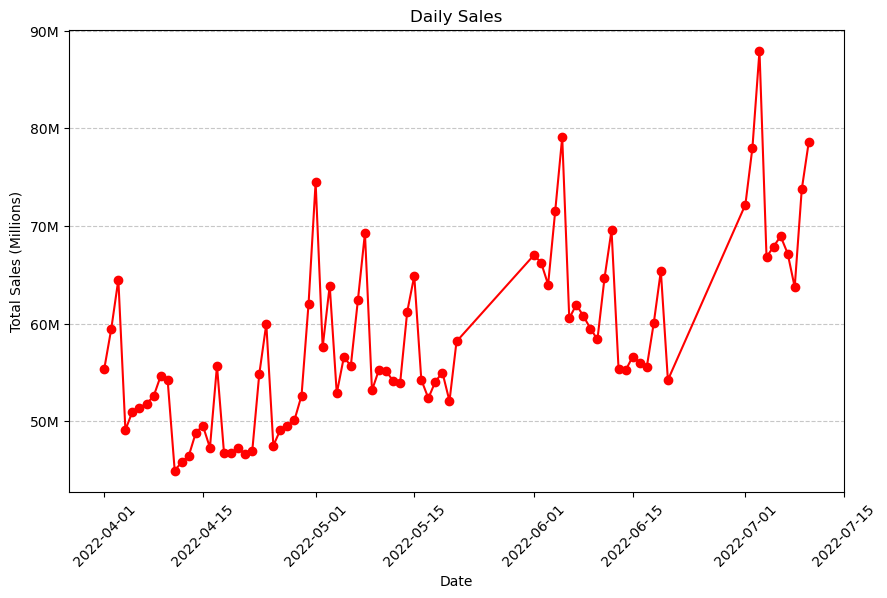

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Plotting daily sales
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['date'], daily_sales['total_sales'], marker='o', color='red', linestyle='-')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Apply the millions formatter to y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


#### ***Monthly Sales***

In [39]:
# Grouping month and summing total sale 
monthly_sales = monthly_sales_data.groupby(pd.Grouper(key='date', freq='M'))['total_sales'].sum()

# Converting the index to month names
monthly_sales.index = monthly_sales.index.strftime('%B')

# Resetting index to make it a Dataframe
monthly_sales = monthly_sales.reset_index()

print("Monthly sales")
monthly_sales.head()

Monthly sales


,date,total_sales
0,April,1542732389.00
1,May,1216468062.00
2,June,1241662776.00
3,July,725085295.00


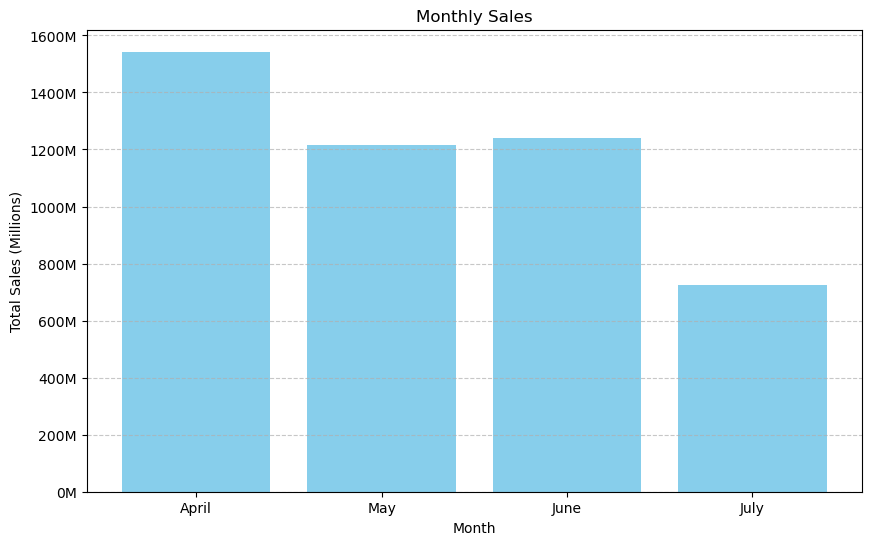

In [41]:
from matplotlib.ticker import FuncFormatter

# Function to format y-axis values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Plotting monthly sales
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['date'], monthly_sales['total_sales'], color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (Millions)')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Apply the millions formatter to y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#### ***Profit Margin***

In [43]:
# Calculate cogs cost on sold goods
cogs = monthly_sales_data["total_weighted_landing_price"].sum()

# Calculating profit margin
profit_margin = ((total_sales_revenue - cogs) / total_sales_revenue ) * 100

print(f"Total sales revenue : {total_sales_revenue:,.2f}")
print(f"Total COGS: {cogs:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")

Total sales revenue : 4,725,948,522.00
Total COGS: 4,162,540,866.20
Profit Margin: 11.92%


### ***Product KPIs***

#### ***Top Products by Sales Volume***

In [45]:
# Groupin by product_id and summing sales,quantity  
product_performance = monthly_sales_data.groupby('product_id').agg({
    'procured_quantity': 'sum',
    'unit_selling_price': 'first',
    'total_sales' : 'sum'
}).reset_index()

product_data = product_data.rename(columns = {'product_id' : 'product_id_product_id'})

# Get product names from product_data
product_performance = product_performance.merge(product_data[['product_id_product_id', 'product_name','category_0','category_1','category_2']], left_on='product_id', right_on='product_id_product_id', how='left')

# Identify top 10 best-selling products by sales volume
top_selling_products_volume = product_performance.sort_values(by='procured_quantity', ascending=False).reset_index().head(10)

print("Top 10 Best-Selling Products by Volume:")
top_selling_products_volume[['product_name', 'procured_quantity']]

Top 10 Best-Selling Products by Volume:


,product_name,procured_quantity
0,Amul Taaza Toned Fresh Milk,1261153
1,Onion,1171389
2,Amul Gold Full Cream Fresh Milk,897112
3,Hybrid Tomato,766785
4,Desi Tomato,719921
5,Green Chilli,521772
6,Coriander Bunch,509505
7,Potato (Chipsona),483844
8,Cucumber,461428
9,Lady Finger,441270


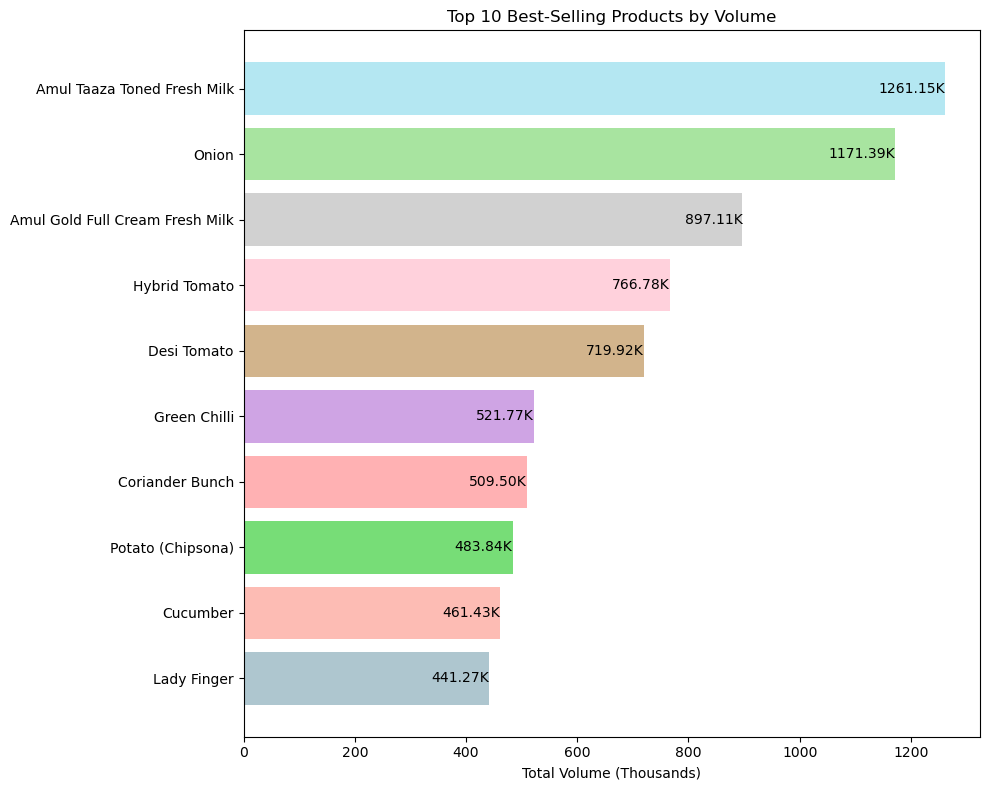

In [47]:

# Convert total sales to thousands
top_selling_products_volume['total_volume_k'] = top_selling_products_volume['procured_quantity'] / 1_000

# Reverse the DataFrame to display the top product at the top in the horizontal bar chart
top_selling_products_volume_plt = top_selling_products_volume.iloc[::-1]

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_selling_products_volume_plt['product_name'], top_selling_products_volume_plt['total_volume_k'],color = [
    '#AEC6CF',  # Pastel blue
    '#FDBCB4',  # Pastel orange
    '#77DD77',  # Pastel green
    '#FFB1B3',  # Pastel red
    '#CFA4E4',  # Pastel purple
    '#D2B48C',  # Tan (soft brown)
    '#FFD1DC',  # Pastel pink
    '#D1D1D1',  # Light gray
    '#A8E4A0',  # Soft olive
    '#B4E7F2'   # Pastel cyan
]
)

# Add x-axis label in millions
plt.xlabel('Total Volume (Thousands)')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}K', ha='right', va='center')

plt.title('Top 10 Best-Selling Products by Volume')
plt.tight_layout()
plt.show()



#### ***Top Products by Sales Revenue***

In [49]:
# Identify top 10 best-selling products by revenue
top_selling_products_revenue = product_performance.sort_values(by='total_sales', ascending=False).head(10).reset_index()

print("Top 10 Best-Selling Products by Sales:")
top_selling_products_revenue[['product_name','procured_quantity','total_sales']]

Top 10 Best-Selling Products by Sales:


,product_name,procured_quantity,total_sales
0,Fortune Soya Health Refined Soyabean Oil,250055,44814504.00
1,Aashirvaad Shudh Chakki Whole Wheat Atta (10 kg),110221,40646976.00
2,Fortune Premium Kachi Ghani Pure Mustard Oil,194562,36007725.00
3,Amul Taaza Toned Fresh Milk,1261153,31410529.00
4,Chakki Atta (10 kg),97533,30364023.00
5,Onion,1171389,27511576.00
6,Amul Gold Full Cream Fresh Milk,897112,26829751.00
7,Maggi Masala Noodles - Pack of 12,175127,26704570.00
8,Amul Salted Butter,97703,24163756.00
9,Tender Coconut,396320,22922428.00


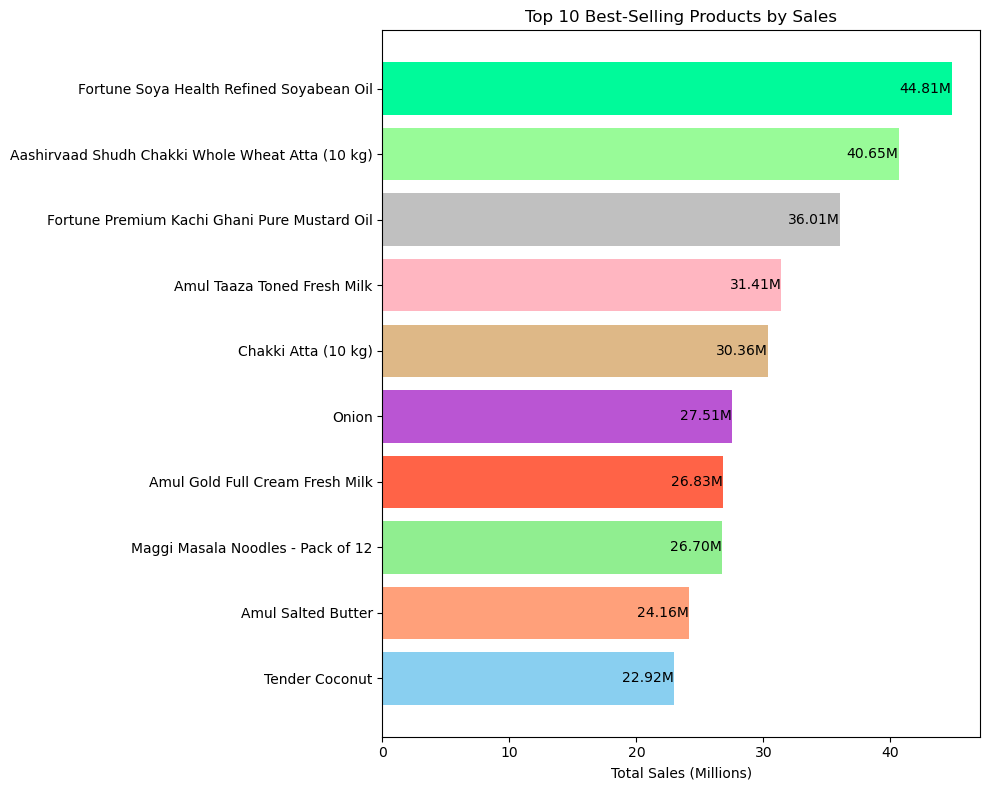

In [51]:
# Convert total sales to millions
top_selling_products_revenue['total_sales_millions'] = top_selling_products_revenue['total_sales'] / 1_000_000

# Reverse the DataFrame to display the top product at the top in the horizontal bar chart
top_selling_products_revenue_plt = top_selling_products_revenue.iloc[::-1]

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_selling_products_revenue_plt['product_name'], top_selling_products_revenue_plt['total_sales_millions'], color=[
    '#89CFF0',  # Soft blue (repeat colors if needed)
    '#FFA07A',  # Light Salmon (repeat colors if needed)
    '#90EE90',  # Light green (repeat colors if needed)
    '#FF6347',  # Tomato (repeat colors if needed)
    '#BA55D3',  # Medium orchid (repeat colors if needed)
    '#DEB887',  # Burlywood (repeat colors if needed)
    '#FFB6C1',  # Light pink (repeat colors if needed)
    '#C0C0C0',  # Silver (repeat colors if needed)
    '#98FB98',  # Pale green (repeat colors if needed)
    '#00FA9A'   # Medium spring green (repeat colors if needed)
])

# Add x-axis label in millions
plt.xlabel('Total Sales (Millions)')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}M', ha='right', va='center')

plt.title('Top 10 Best-Selling Products by Sales')
plt.tight_layout()
plt.show()


#### ***Top Selling Category***

In [53]:
# Grouping by category and calculate total revenue for each category
category_performance = product_performance.groupby(['category_0'],observed = False).agg({
    'total_sales': 'sum'}).reset_index()

# Sorting by total revenue to identify top-selling categories
top_selling_categories = category_performance.sort_values(by='total_sales', ascending=False).reset_index().head(10)

print("Top 10 Best-Selling Categories by Sales:")
top_selling_categories[['category_0','total_sales']]

Top 10 Best-Selling Categories by Sales:


,category_0,total_sales
0,"Dry Fruits, Masala & Oil",815641197.00
1,Dairy & Breakfast,547623366.00
2,"Atta, Rice & Dal",540824597.00
3,Vegetables & Fruits,491973610.00
4,Personal Care,320269061.00
5,Cleaning Essentials,308661433.00
6,Cold Drinks & Juices,255625764.00
7,"Tea, Coffee & Health Drinks",205651092.00
8,Munchies,195479259.00
9,Instant & Frozen Food,194664391.00


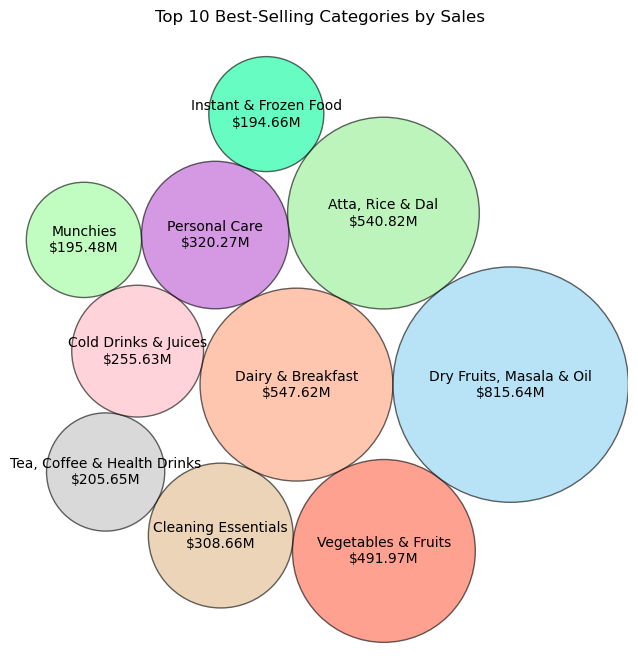

In [55]:
# Reverse the DataFrame to display the top product at the top in the horizontal bar chart
top_selling_categories_plt = top_selling_categories.iloc[::-1]


# Prepare data for circlify
circles = circlify.circlify(
    top_selling_categories_plt['total_sales'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Define a color palette
colors = ['#00FA9A', '#98FB98', '#C0C0C0', '#FFB6C1', '#DEB887', '#BA55D3', '#FF6347', '#90EE90', '#FFA07A', '#89CFF0']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
ax.set_aspect('equal')

# Title
plt.title('Top 10 Best-Selling Categories by Sales')

# Plot circles with colors
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
for circle, label, value, color in zip(circles, top_selling_categories_plt['category_0'], top_selling_categories_plt['total_sales'], colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, edgecolor='black', facecolor=color, alpha=0.6))
    plt.text(x, y, f"{label}\n${value / 1_000_000:.2f}M", ha='center', va='center', size=10)

# Set the limits to ensure circles fit within the plot area
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plt.show()

#### ***Profitable Products***

In [57]:
profitable_products = monthly_sales_data.groupby('product_id').agg({
    'total_weighted_landing_price': 'sum',
    'total_sales' : 'sum'
}).reset_index()

# Calculate profit for each product
profitable_products['total_profit'] = profitable_products['total_sales'] - profitable_products['total_weighted_landing_price']

# Calculate profit margin for each product
profitable_products['profit_margin'] = (profitable_products['total_profit'] / profitable_products['total_sales']) * 100

# Get product names from product_data
profitable_products = profitable_products.merge(product_data[['product_id_product_id','product_name']],left_on = 'product_id',right_on = 'product_id_product_id',how = 'left')

# Remove NaN product names
profitable_products = profitable_products.dropna(subset=['product_name'])

# Exclude products with zero total cost to avoid infinite margins
profitable_products = profitable_products[(profitable_products['total_weighted_landing_price'] > 0) & (profitable_products['total_sales'] >= 10000)]

# Identify top 10 most profitable products by profit margin
most_profitable_products = profitable_products.sort_values('profit_margin',ascending = False).reset_index().head(10)

print("Most Profitable Products :")
most_profitable_products[['product_name','profit_margin']]

Most Profitable Products :


,product_name,profit_margin
0,Sunpure Sulphurless Sugar,99.97
1,"Prestige Pressure Cooker (Aluminium, 3 l, Silver)",97.65
2,Johnson's No More Tears Baby Shampoo,94.62
3,Aravi Kitchen Gloves,72.95
4,Brown Pre - Rolled Cones by Baked - Pack of 6,67.40
5,"Rolling Paper (King Size, Brown) By Stash Pro",66.52
6,Small Rolling Paper (Brown) By Stash Pro,65.44
7,"Scented Votive Candle (Jasmine, White) by Aura...",65.42
8,Ash Gourd,65.04
9,Volvo Plus Disposable Hand Gloves,64.57


### ***Geographic KPIs***

#### ***Sales by region***

In [59]:
# Grouping by city_name and calculating revenue of each city
city_performance = monthly_sales_data.groupby('city_name',observed = False).agg({'total_sales' : 'sum'})

# sorting by total sales
city_performance = city_performance.sort_values('total_sales',ascending = False).reset_index()

print("Sales by city :")
city_performance[['city_name', 'total_sales']]

Sales by city :


,city_name,total_sales
0,Delhi,2288798124.00
1,HR-NCR,1139562783.00
2,Bengaluru,865422917.00
3,Mumbai,432164698.00


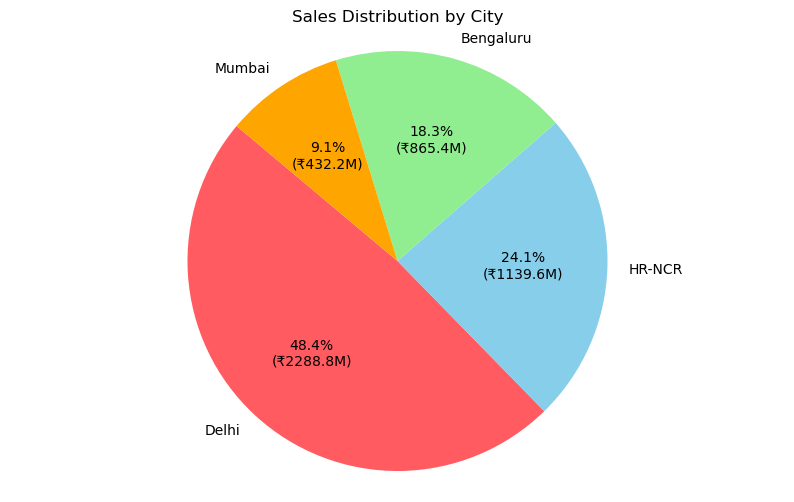

In [61]:
# Function to format the labels
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n(₹{absolute/1_000_000:.1f}M)"

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(city_performance['total_sales'], labels=city_performance['city_name'], autopct=lambda pct: func(pct, city_performance['total_sales']), startangle=140, colors =['#FF5B61','skyblue','lightgreen','orange'])
plt.title('Sales Distribution by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### ***Customer KPIs***

#### ***Customer Lifetime Value***

In [63]:
customer_revenue = monthly_sales_data.groupby('customer_id')['total_sales'].sum()

# 2. Calculate the number of unique purchasing months for each customer
monthly_sales_data['year_month'] = monthly_sales_data['date'].dt.to_period('M')
customer_months = monthly_sales_data.groupby('customer_id')['year_month'].nunique()

# 3. Average Purchase Value
average_purchase_value = customer_revenue.sum() / monthly_sales_data['order_id'].nunique()

# 4. Purchase Frequency
purchase_frequency = customer_months.sum() / monthly_sales_data['customer_id'].nunique()

# 5. Customer Value
customer_value = average_purchase_value * purchase_frequency

# 6. Average Customer Lifespan (assuming 3 years)
average_lifespan = 3

# 7. Calculate CLTV
CLTV = customer_value * average_lifespan

print(f"Average Purchase Value: ${average_purchase_value:.2f}")
print(f"Purchase Frequency: {purchase_frequency:.2f}")
print(f"Customer Value: ${customer_value:.2f}")
print(f"Customer Lifetime Value (CLTV): ${CLTV:.2f}")


Average Purchase Value: $453.07
Purchase Frequency: 1.90
Customer Value: $859.47
Customer Lifetime Value (CLTV): $2578.41


#### ***Retention Rate***

In [65]:
# Convert 'date' to period to facilitate grouping by month
monthly_sales_data['year_month'] = monthly_sales_data['date'].dt.to_period('M')

# Calculate the number of unique customers in the initial period
initial_customers = monthly_sales_data[monthly_sales_data['year_month'] == monthly_sales_data['year_month'].min()]['customer_id'].nunique()

# Calculate the number of customers who remain active in subsequent periods
retained_customers = monthly_sales_data.groupby('year_month')['customer_id'].nunique()

# Calculate Retention Rate directly
retention_rate = (retained_customers / initial_customers) * 100

print("Retention Rate:")
print(retention_rate)

Retention Rate:
year_month
2022-04   100.00
2022-05    97.95
2022-06    95.53
2022-07    70.37
Freq: M, Name: customer_id, dtype: float64


#### ***Churn Rate***

In [67]:
# 4. Churn Rate
last_month_customers = monthly_sales_data[monthly_sales_data['year_month'] == monthly_sales_data['year_month'].max()]['customer_id'].unique()
churn_rate = (1 - (len(last_month_customers) / monthly_sales_data['customer_id'].nunique())) * 100  # Percentage of customers who stopped buying

print("Churn Rate: {:.2f}%".format(churn_rate))

Churn Rate: 63.31%


In [69]:
# Convert 'date' to period to facilitate grouping by month
monthly_sales_data['year_month'] = monthly_sales_data['date'].dt.to_period('M')

# Group the data by 'year_month' and count the number of unique customers for each month
customers_per_month = monthly_sales_data.groupby('year_month')['customer_id'].nunique()

# Initialize a dictionary to store churn rates per month
churn_rates = {}

# Iterate over each month (excluding the first month)
for i in range(1, len(customers_per_month)):
    # Identify customers who made purchases in the previous month
    previous_month_customers = monthly_sales_data[monthly_sales_data['year_month'] == customers_per_month.index[i - 1]]['customer_id'].unique()
    # Identify customers who made purchases in the current month
    current_month_customers = monthly_sales_data[monthly_sales_data['year_month'] == customers_per_month.index[i]]['customer_id'].unique()
    # Calculate churned customers (those in the previous month but not in the current month)
    churned_customers = set(previous_month_customers) - set(current_month_customers)
    # Calculate churn rate for the current month
    churn_rate = len(churned_customers) / customers_per_month[customers_per_month.index[i - 1]] * 100  # Convert to percentage
    # Store churn rate in the dictionary
    churn_rates[customers_per_month.index[i]] = churn_rate

# Convert the dictionary to a DataFrame for easier visualization
churn_rates_df = pd.DataFrame(list(churn_rates.items()), columns=['year_month', 'churn_rate'])

print("Churn Rates per Month:")
print(churn_rates_df)


Churn Rates per Month:
  year_month  churn_rate
0    2022-05       42.43
1    2022-06       45.82
2    2022-07       54.77


In [71]:
# Define the periods (e.g., monthly churn rate)
monthly_sales_data['month'] = monthly_sales_data['date'].dt.to_period('M')

# Identify unique customers for each month and city
unique_customers_per_month_city = monthly_sales_data.groupby(['month', 'city_name'],observed=False)['customer_id'].apply(set)

# Initialize a dictionary to store churn rates for each city
churn_rates_by_city = {}

# Loop through each city to calculate churn rate
for city, city_customers in unique_customers_per_month_city.groupby(level='city_name',observed=False):
    # Initialize a list to store churn rates for the current city
    churn_rates = []
    # Loop through each period to calculate churn rate
    for i in range(1, len(city_customers)):
        previous_month_customers = city_customers.iloc[i-1]
        current_month_customers = city_customers.iloc[i]
        # Calculate churned customers
        churned_customers = previous_month_customers - current_month_customers
        # Calculate churn rate
        if len(previous_month_customers) > 0:  # Avoid division by zero
            churn_rate = len(churned_customers) / len(previous_month_customers) * 100
        else:
            churn_rate = 0
        churn_rates.append(churn_rate)
    # Store churn rates for the current city in the dictionary
    churn_rates_by_city[city] = churn_rates

# Create a DataFrame to display churn rates by city
churn_rate_by_city_df = pd.DataFrame({
    'city_name': list(churn_rates_by_city.keys()),
    'churn_rates': [sum(churn_rates) / len(churn_rates) for churn_rates in churn_rates_by_city.values()]
})

# Display churn rates by city
print(churn_rate_by_city_df)

   city_name  churn_rates
0  Bengaluru        48.08
1      Delhi        50.09
2     HR-NCR        41.26
3     Mumbai        54.23


#### ***Repeat Purchase Rate***

In [73]:
# Group monthly sales data by 'customer_id' and count the number of unique 'order_id's for each customer
customer_orders = monthly_sales_data.groupby('customer_id')['order_id'].nunique()

# Calculate the total number of customers
total_customers = len(customer_orders)

# Calculate the number of repeat customers
num_repeat_customers = (customer_orders > 1).sum()

# Calculate the repeat purchase rate
repeat_purchase_rate = (num_repeat_customers / total_customers) * 100

print("Total Number of Customers:", total_customers)
print("Number of Repeat Customers:", num_repeat_customers)
print("Repeat Purchase Rate:", repeat_purchase_rate, "%")

Total Number of Customers: 1986587
Number of Repeat Customers: 1225347
Repeat Purchase Rate: 61.68101371850314 %


#### ***Average Purchase Frequency***


In [75]:
# 5. Average Purchase Frequency
total_purchases = monthly_sales_data['order_id'].nunique()
unique_customers = monthly_sales_data['customer_id'].nunique()
average_purchase_frequency = total_purchases / unique_customers

print("Average Purchase Frequency: {:.2f}".format(average_purchase_frequency))

Average Purchase Frequency: 5.25
